# Pymaceuticals Inc.
---

### Analysis

Capomulin's data is not skewed by any outliers therefore it is assumed that the data provides quality data without significant irregularities.  The relatively tight distribution of the box plot shows consistency of effectiveness as it pertains to tumor reduction.  

Capomulin's performance in reducing tumor size is superior to both Infubinal and Ceftamin.  The impact on tumor size between Capomulin and Ramicane is fairly even.  

Additonally, there is a fairly direct correlation between mouse weight and average tumor volume
(.84). This would suggest that Capomulin combined with weight loss in the mouse would present a positive treatment result.

Finally, given the evidence of the correlation with weight.  The average weight of the mice in each drug regimen should be analysed to confirm that mouse weight did not impact a specific regimen as compare to others.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="right", on="Mouse ID")
combined_data_df = combined_data_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"] ]

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(combined_data_df["Mouse ID"].nunique())


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates_array = np.array(duplicates_df["Mouse ID"].unique(), dtype=object)

duplicates_array


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_mouse_ids = duplicates_df["Mouse ID"].unique()
all_duplicates_data = combined_data_df[combined_data_df["Mouse ID"].isin(duplicates_mouse_ids)]

all_duplicates_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df[~combined_data_df["Mouse ID"].isin(duplicates_mouse_ids)]

cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = combined_data_df[~combined_data_df["Mouse ID"].isin(duplicates_mouse_ids)]
num_unique_mice = cleaned_df["Mouse ID"].nunique()

print(num_unique_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats= cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg([
    'mean',
    'median',
    'var', 
    'std', 
    'sem'
])

summary_stats.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

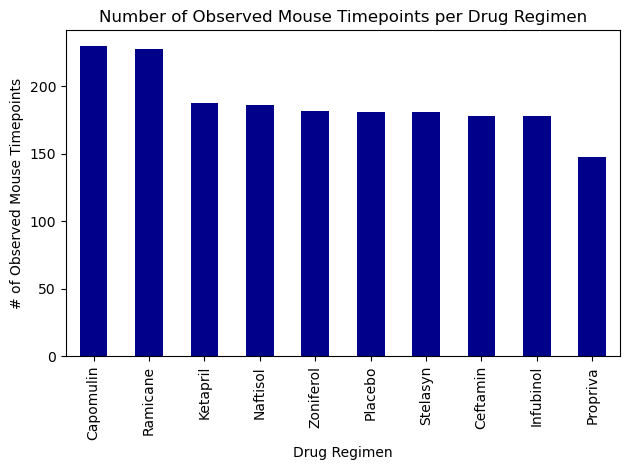

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = cleaned_df.groupby('Drug Regimen').agg({"Mouse ID": 'count'})
sorted_drug_regimen = drug_regimen.sort_values(by='Mouse ID', ascending=False)
sorted_drug_regimen['Mouse ID'].plot(kind='bar', color='darkblue');

plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")  
plt.ylabel("# of Observed Mouse Timepoints")  

# Show the plot
plt.tight_layout()
plt.show()




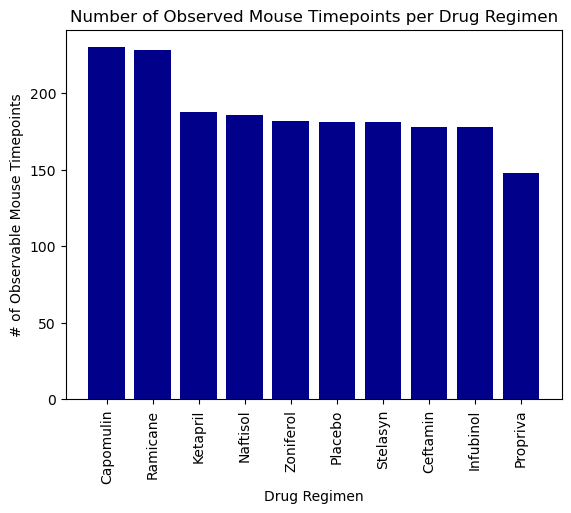

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplo
drug_regimen = cleaned_df.groupby('Drug Regimen').agg({"Mouse ID": 'count'}).reset_index()
drug_regimen = drug_regimen.rename(columns={'Mouse ID': 'Total Count'})
sorted_drug_regimen = drug_regimen.sort_values(by='Total Count', ascending=False)

plt.bar(sorted_drug_regimen['Drug Regimen'], sorted_drug_regimen['Total Count'], color='darkblue');

plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel('Drug Regimen');
plt.ylabel('# of Observable Mouse Timepoints');
plt.xticks(rotation=90);



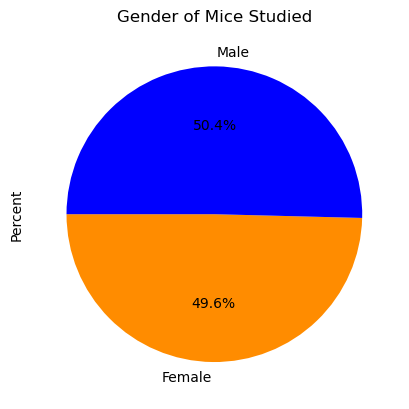

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = cleaned_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['darkorange', 'blue'])

plt.title("Gender of Mice Studied");
plt.ylabel("Percent");



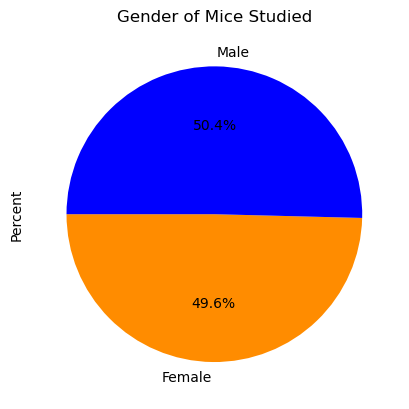

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = cleaned_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=180,
    colors=['darkorange', 'blue']
);

plt.title("Gender of Mice Studied");
plt.ylabel("Percent");

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')




In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes    
for treatment in treatments:
    treatment_data = cleaned_df[cleaned_df['Drug Regimen'] == treatment]
    last_timepoint = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
    merged_data = pd.merge(last_timepoint, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')
    tumor_volumes = merged_data['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumor_volumes.values)  
    
    # Determine outliers using upper and lower bounds
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outlier_indices = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)].index
    
    print(f"Treatment: {treatment}")
    if len(outliers) > 0:
        print(f"Potential outliers: {outliers.tolist()}");
    else:
        print("No outliers detected.");
    print("\n");

print(outlier_indices);
    
    
    

Treatment: Capomulin
No outliers detected.


Treatment: Ramicane
No outliers detected.


Treatment: Infubinol
Potential outliers: [36.3213458]


Treatment: Ceftamin
No outliers detected.


Index([], dtype='int64')


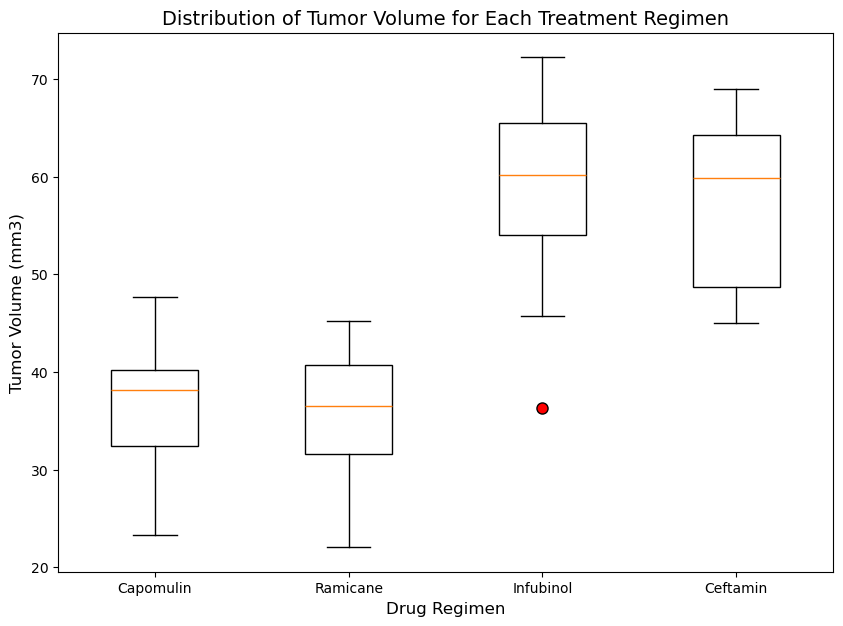

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig = plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_data, tick_labels=treatments, patch_artist=True, 
            boxprops=dict(facecolor='white', color='black'), 
            flierprops=dict(markerfacecolor='r', marker='o', markersize=8))

plt.title('Distribution of Tumor Volume for Each Treatment Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.show()



## Line and Scatter Plots

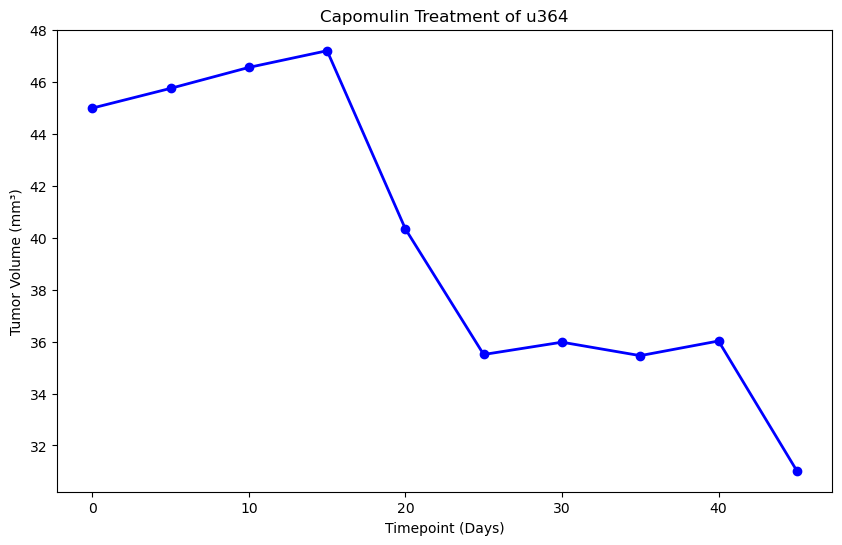

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_regimen_data = capomulin_mice = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
random_mouse_id = random.choice(capomulin_mice)  

capomulin_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == random_mouse_id)]


plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)


plt.title(f'Capomulin Treatment of {random_mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

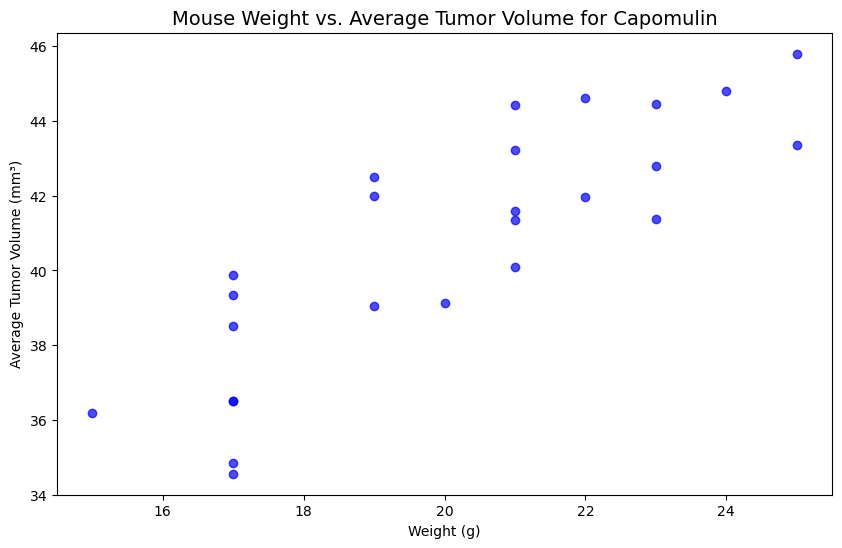

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')


plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.7)


plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


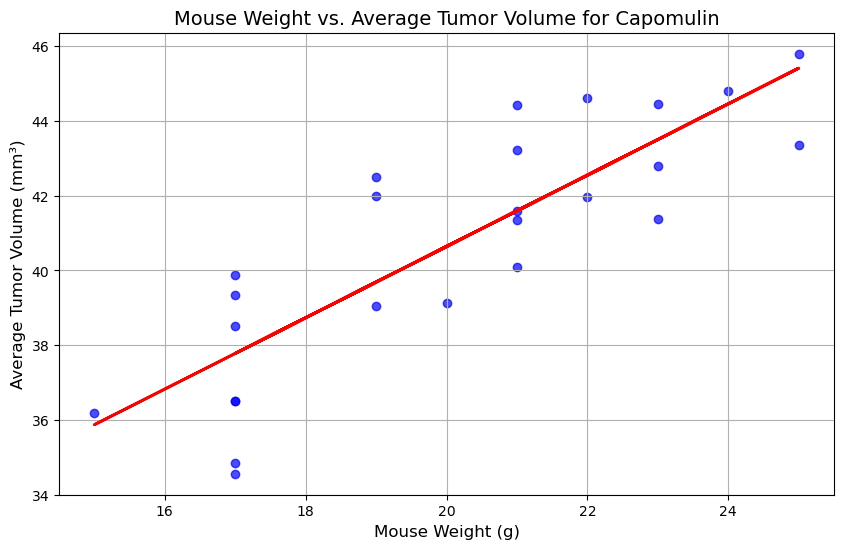

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')


correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is: {correlation:.2f}")


slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])



plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.7)
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r', linewidth=2)

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)


plt.grid(True)
plt.show()